IMPORT LIB

In [1646]:
import pandas as  pd    
import seaborn as sns
import numpy as np
import plotly.express as px 
import openpyxl
import matplotlib.pyplot as plt

IMPORT DATA

In [1647]:
df_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/employee_survey_data.csv')
df_general=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/general_data.csv')
df_in_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/in_time.csv')
df_manager_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/manager_survey_data.csv')
df_out_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/out_time.csv')
dictionary = pd.read_excel('/Users/kalou/Documents/GitHub/rh-analysis/archive/data_dictionary.xlsx')


EXPLO DATA

In [1648]:
df_manager_survey

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [1649]:
df_manager_survey.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

DF SURVEY

In [1650]:
df_survey.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [1651]:
df_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [1652]:
df_survey_clean=df_survey.dropna()

DF GENERAL

In [1653]:
df_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [1654]:
df_general_survey = pd.merge(df_general, df_survey, on='EmployeeID', how='outer')


In [1655]:
df_general_final = pd.merge(df_general_survey, df_manager_survey, on='EmployeeID', how='outer')


In [1656]:
df_general_final.shape

(4410, 29)

In [1657]:
df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [1658]:
df_general_survey_clean=df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

In [1659]:
df_general_explo = df_general_survey_clean.drop(columns=['Gender', 'Over18', 'EmployeeCount', 'StandardHours'])

In [1660]:
df_general_explo['MonthlyIncome']

0       131160
1        41890
2       193280
3        83210
4        23420
         ...  
4404     35390
4405     60290
4406     26790
4407     37020
4408     23980
Name: MonthlyIncome, Length: 4327, dtype: int64

In [1661]:
Salary=df_general_explo.groupby('JobRole')['MonthlyIncome'].mean()
Salary


JobRole
Healthcare Representative    61026.089239
Human Resources              58896.688312
Laboratory Technician        66698.500000
Manager                      62559.533333
Manufacturing Director       69379.906542
Research Director            65351.848739
Research Scientist           65093.070684
Sales Executive              65041.220021
Sales Representative         64768.852459
Name: MonthlyIncome, dtype: float64

WHY DOES R&D HAVE THE HIGHEST ATTRITION PERCENTAGE BY DEPARTMENT

In [1662]:
attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('Department').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'Department': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='Department', orientation='h', title='Attrition Percentage by Department', labels={'x':'Attrition Percentage', 'y':'Department'})
fig.show()

In [1663]:
px.histogram(df_general_explo, x='EnvironmentSatisfaction', y='Attrition', histfunc='avg')

WHY DOES MEDICAL AND LIFE SCIENCES EDUCATION FIELD HAVE THE HIGHEST EDUCATION FIELD PERCENTAGE OF ATTRITION?

In [1664]:


attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('EducationField').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'EducationField': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='EducationField', orientation='h', title='Attrition Percentage by Education Field', labels={'x':'Attrition Percentage', 'y':'Education Field'})
fig.show()


NOT IMPORTANT

In [1665]:


attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('BusinessTravel').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'BusinessTravel': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='BusinessTravel', orientation='h', title='Attrition Percentage by BusinessTravel', labels={'x':'Attrition Percentage', 'y':'Business Travel'})
fig.show()

WHY DOES  SALES EX, RESEARCH SCIENTIST AND LARORATORY TECH HAVE THE HIGHEST JOBROLE ATTRITION PERCENTAGE?

In [1666]:

attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('JobRole').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'JobRole': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='JobRole', orientation='h', title='Attrition Percentage by JobRole', labels={'x':'Attrition Percentage', 'y':'JobRole'})
fig.show()

In [1667]:
df_general_explo['JobRole'].value_counts()

JobRole
Sales Executive              959
Research Scientist           863
Laboratory Technician        760
Manufacturing Director       428
Healthcare Representative    381
Manager                      300
Sales Representative         244
Research Director            238
Human Resources              154
Name: count, dtype: int64

In [1668]:
df_general_explo[df_general_explo['JobRole'] == 'Sales Executive']['JobRole'].count()


959

why Single employees have a high attrition rate?

In [1669]:

attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('MaritalStatus').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'MaritalStatus': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='MaritalStatus', orientation='h', title='Attrition Percentage by MaritalStatus', labels={'x':'Attrition Percentage', 'y':'MaritalStatus'})
fig.show()

In [1670]:
nb_attrition =df_general_explo['Attrition'].value_counts()

DF IN TIME

In [1671]:
df_in_time.isnull().sum()


Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [1672]:
df_in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [1673]:
df_null=df_in_time.columns[df_in_time.isna().all()]
df_null

Index(['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25'],
      dtype='object')

In [1674]:
df_in_time.drop(columns=['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25', 'Unnamed: 0'], inplace=True)

In [1675]:
df_in_time = df_in_time.apply(pd.to_datetime)


In [1676]:
df_in_time.fillna(pd.to_datetime('1900-01-01 00:00:00'), inplace=True)


In [1677]:
df_in_time.dtypes

2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
2015-01-07    datetime64[ns]
2015-01-08    datetime64[ns]
                   ...      
2015-12-24    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 249, dtype: object

DF OUT TIME

In [1678]:
df_out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [1679]:
#df_null2=df_out_time.columns[df_out_time.isna().all()]
#df_null2
#df_out_time.drop(columns=['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01','2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10','2015-11-11', '2015-12-25', 'Unnamed: 0'], inplace=True)
#df_out_time = df_out_time.apply(pd.to_datetime)
#df_in_time.fillna(pd.to_datetime('1900-01-01 00:00:00'), inplace=True)
#df_out_time
#result = df_out_time - df_in_time
#result
#hours=result.mean(axis=1)
#hours
#time_only = hours.dt.components['hours'].astype(str) + ':' + hours.dt.components['minutes'].astype(str) + ':' + hours.dt.components['seconds'].astype(str)
#df_general_explo['avg_working_time']=time_only
#df_general_explo['avg_working_time'].isnull().sum()


In [1680]:
import plotly.graph_objects as go


In [1681]:
# Drop rows with NaN values in 'avg_working_time' column
#df_general_explo = df_general_explo.dropna(subset=['avg_working_time'])

# Convert 'avg_working_time' to datetime format
#df_general_explo['avg_working_time'] = pd.to_datetime(df_general_explo['avg_working_time'], errors='coerce')

# Extract the hour component
#df_general_explo['avg_working_time_hour'] = df_general_explo['avg_working_time'].dt.hour

In [1682]:
df_general_explo.drop(columns='EmployeeID', inplace=True)


In [1683]:
df_general_explo

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,2,Human Resources,Single,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [1684]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [1685]:
avg_job_satisfaction = df_general_explo.groupby('Department')['JobSatisfaction'].mean()
avg_EnvironmentSatisfaction = df_general_explo.groupby('Department')['EnvironmentSatisfaction'].mean()
avg_WorkLifeBalance = df_general_explo.groupby('Department')['WorkLifeBalance'].mean()


In [1686]:
avg_job_satisfaction = df_general_explo.groupby('Department')['JobSatisfaction'].mean()
avg_EnvironmentSatisfaction = df_general_explo.groupby('Department')['EnvironmentSatisfaction'].mean()
avg_WorkLifeBalance = df_general_explo.groupby('Department')['WorkLifeBalance'].mean()


In [1687]:
avg_WorkLifeBalance

Department
Human Resources           2.728723
Research & Development    2.753541
Sales                     2.783270
Name: WorkLifeBalance, dtype: float64

In [1688]:
avg_EnvironmentSatisfaction

Department
Human Resources           2.835106
Research & Development    2.717422
Sales                     2.723954
Name: EnvironmentSatisfaction, dtype: float64

In [1689]:
avg_job_satisfaction

Department
Human Resources           2.680851
Research & Development    2.704674
Sales                     2.774905
Name: JobSatisfaction, dtype: float64

In [1690]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

CORRELATIONS

In [1691]:
numerical_features = df_general_explo.select_dtypes(include='number')


In [1692]:
numerical_features.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Age,1.000000,0.004038,-0.036293,-0.002553,-0.046365,0.303541,-0.034825,-0.030797,0.681844,-0.030548,0.314413,0.217410,0.204564,0.008571,-0.000305,-0.024180,0.019008,-0.025690
DistanceFromHome,0.004038,1.000000,-0.007594,-0.035861,-0.018530,-0.015142,0.036777,0.009745,0.004178,-0.007789,0.030769,0.001802,0.019971,0.018003,-0.010282,0.007716,-0.006985,0.036165
Education,-0.036293,-0.007594,1.000000,0.043622,0.005492,-0.018174,-0.043034,-0.000674,-0.009755,0.009832,0.008329,0.025966,0.007149,-0.045592,-0.005037,-0.005097,-0.019821,-0.035468
JobLevel,-0.002553,-0.035861,0.043622,1.000000,0.045665,-0.008455,0.010213,0.003552,-0.036054,-0.033043,-0.064995,-0.059751,-0.055142,-0.023323,-0.019188,-0.024461,-0.013534,-0.002066
MonthlyIncome,-0.046365,-0.018530,0.005492,0.045665,1.000000,-0.019436,0.008337,0.034060,-0.029165,0.044899,0.002913,0.064142,0.026816,-0.004850,0.003660,0.003822,0.028641,0.020848
NumCompaniesWorked,0.303541,-0.015142,-0.018174,-0.008455,-0.019436,1.000000,0.030801,0.016623,0.240077,-0.030469,-0.115424,-0.034277,-0.107593,0.012786,-0.058693,-0.008561,0.026354,0.019668
PercentSalaryHike,-0.034825,0.036777,-0.043034,0.010213,0.008337,0.030801,1.000000,0.012795,-0.021452,-0.035239,-0.027938,-0.029224,-0.040741,-0.003544,0.035805,-0.040749,-0.003950,0.773872
StockOptionLevel,-0.030797,0.009745,-0.000674,0.003552,0.034060,0.016623,0.012795,1.000000,0.000115,-0.068245,0.007328,0.019142,0.015888,-0.006106,0.038818,-0.024070,0.008173,-0.037210
TotalWorkingYears,0.681844,0.004178,-0.009755,-0.036054,-0.029165,0.240077,-0.021452,0.000115,1.000000,-0.041050,0.633143,0.407461,0.463517,-0.002773,-0.014499,-0.000909,0.003549,-0.002562
TrainingTimesLastYear,-0.030548,-0.007789,0.009832,-0.033043,0.044899,-0.030469,-0.035239,-0.068245,-0.041050,1.000000,-0.009028,0.014364,-0.013949,0.018473,-0.023448,-0.015953,-0.015221,-0.020762


In [1693]:
corr=numerical_features.corr()

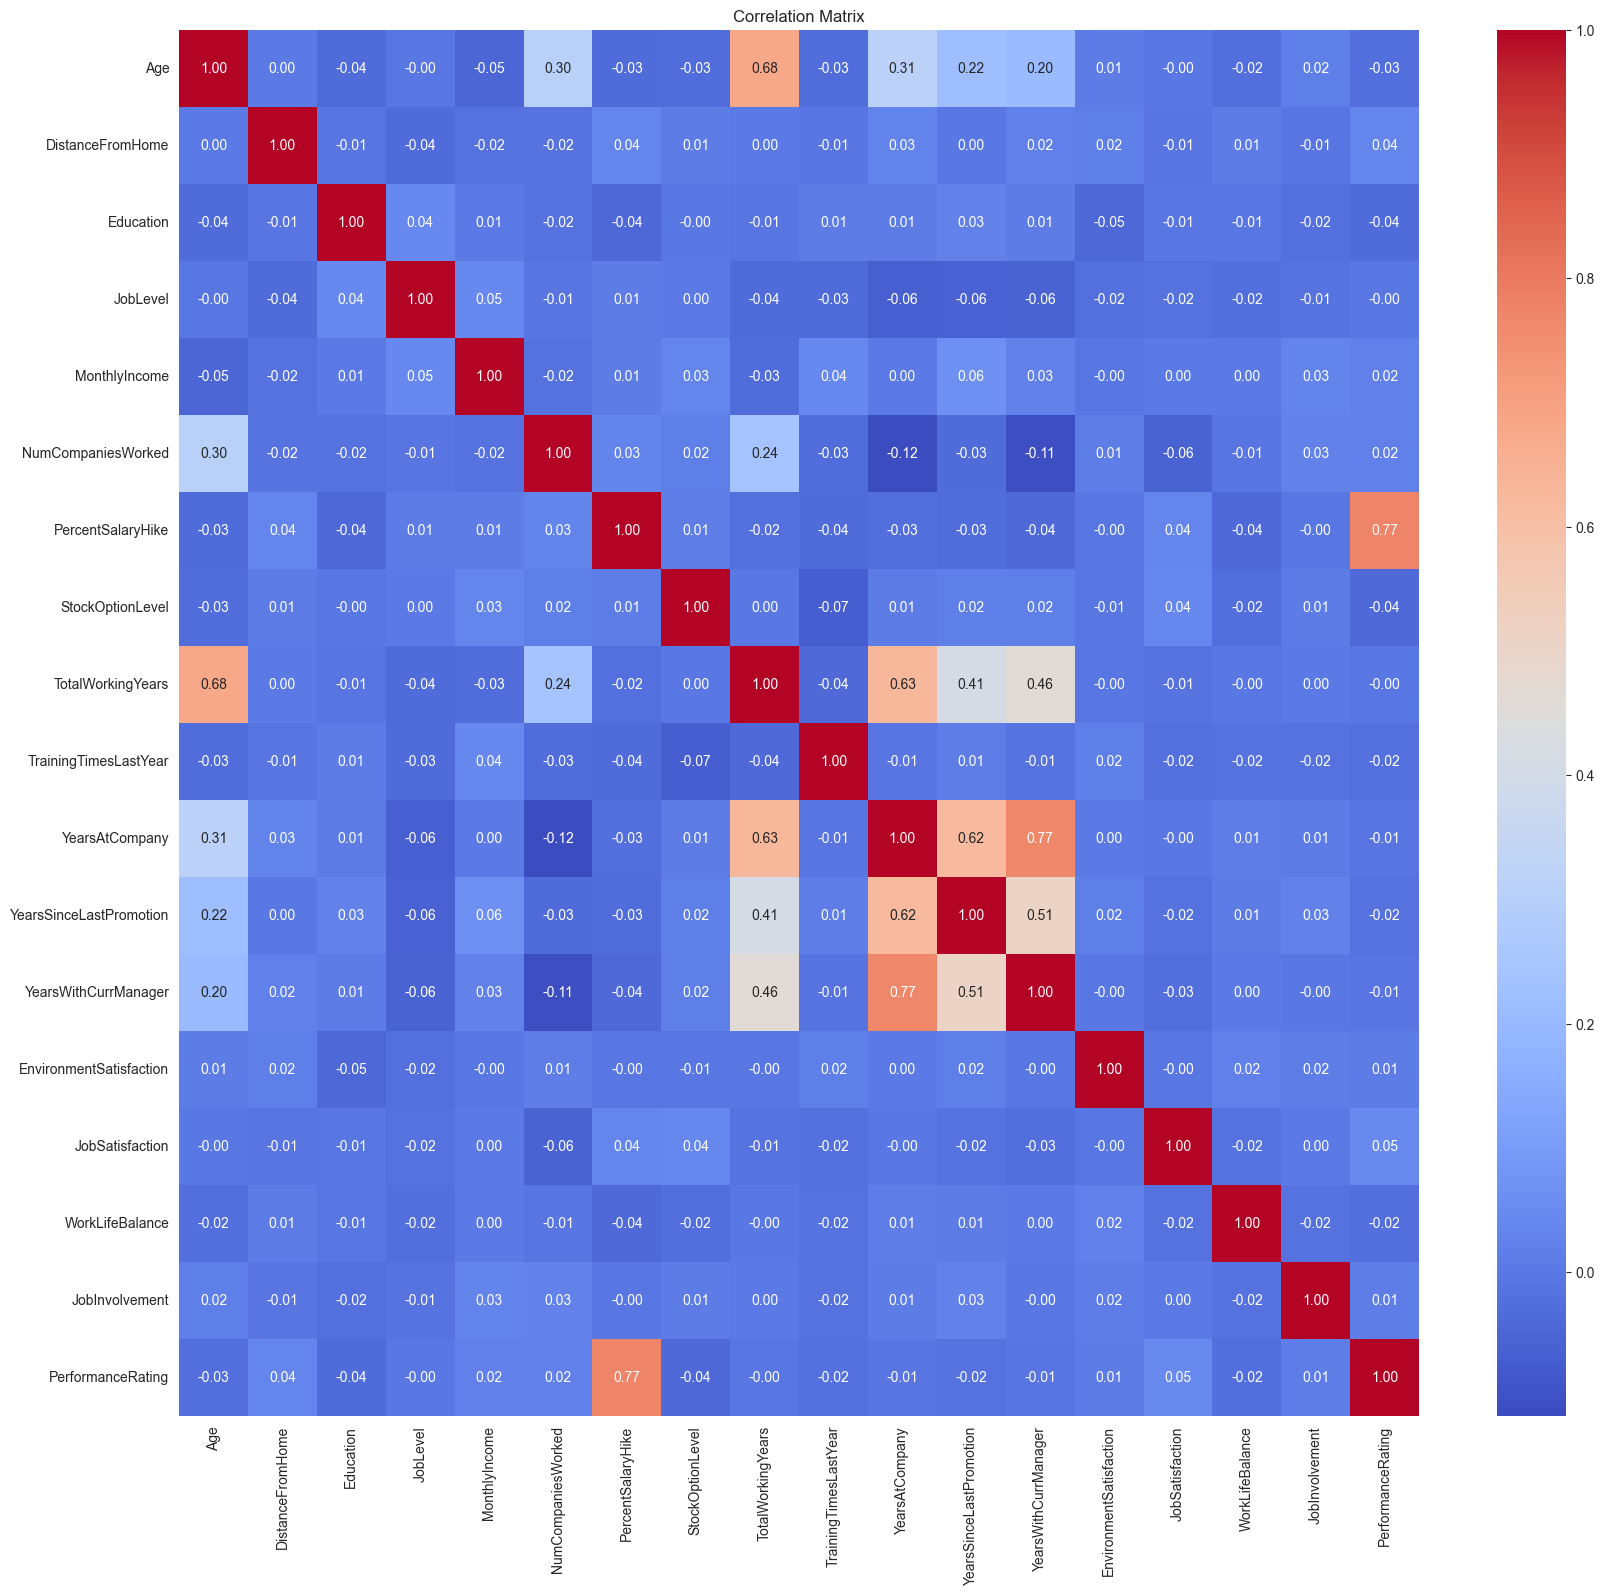

In [1694]:
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [1695]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
lenc=LabelEncoder()
enc=OneHotEncoder()
scaler=StandardScaler()

In [1696]:
scaled_num=scaler.fit_transform(numerical_features)

In [1697]:
no_numerical_features = df_general_explo.select_dtypes(exclude='number')


In [1698]:
no_numerical_features['BusinessTravel']=lenc.fit_transform(no_numerical_features['BusinessTravel'])
no_numerical_features['Department']=lenc.fit_transform(no_numerical_features['Department'])
no_numerical_features['EducationField']=lenc.fit_transform(no_numerical_features['EducationField'])
no_numerical_features['JobRole']=lenc.fit_transform(no_numerical_features['JobRole'])
no_numerical_features['MaritalStatus']=lenc.fit_transform(no_numerical_features['MaritalStatus'])
no_numerical_features['Attrition']=lenc.fit_transform(no_numerical_features['Attrition'])

In [1699]:
nocorr=no_numerical_features.corr()

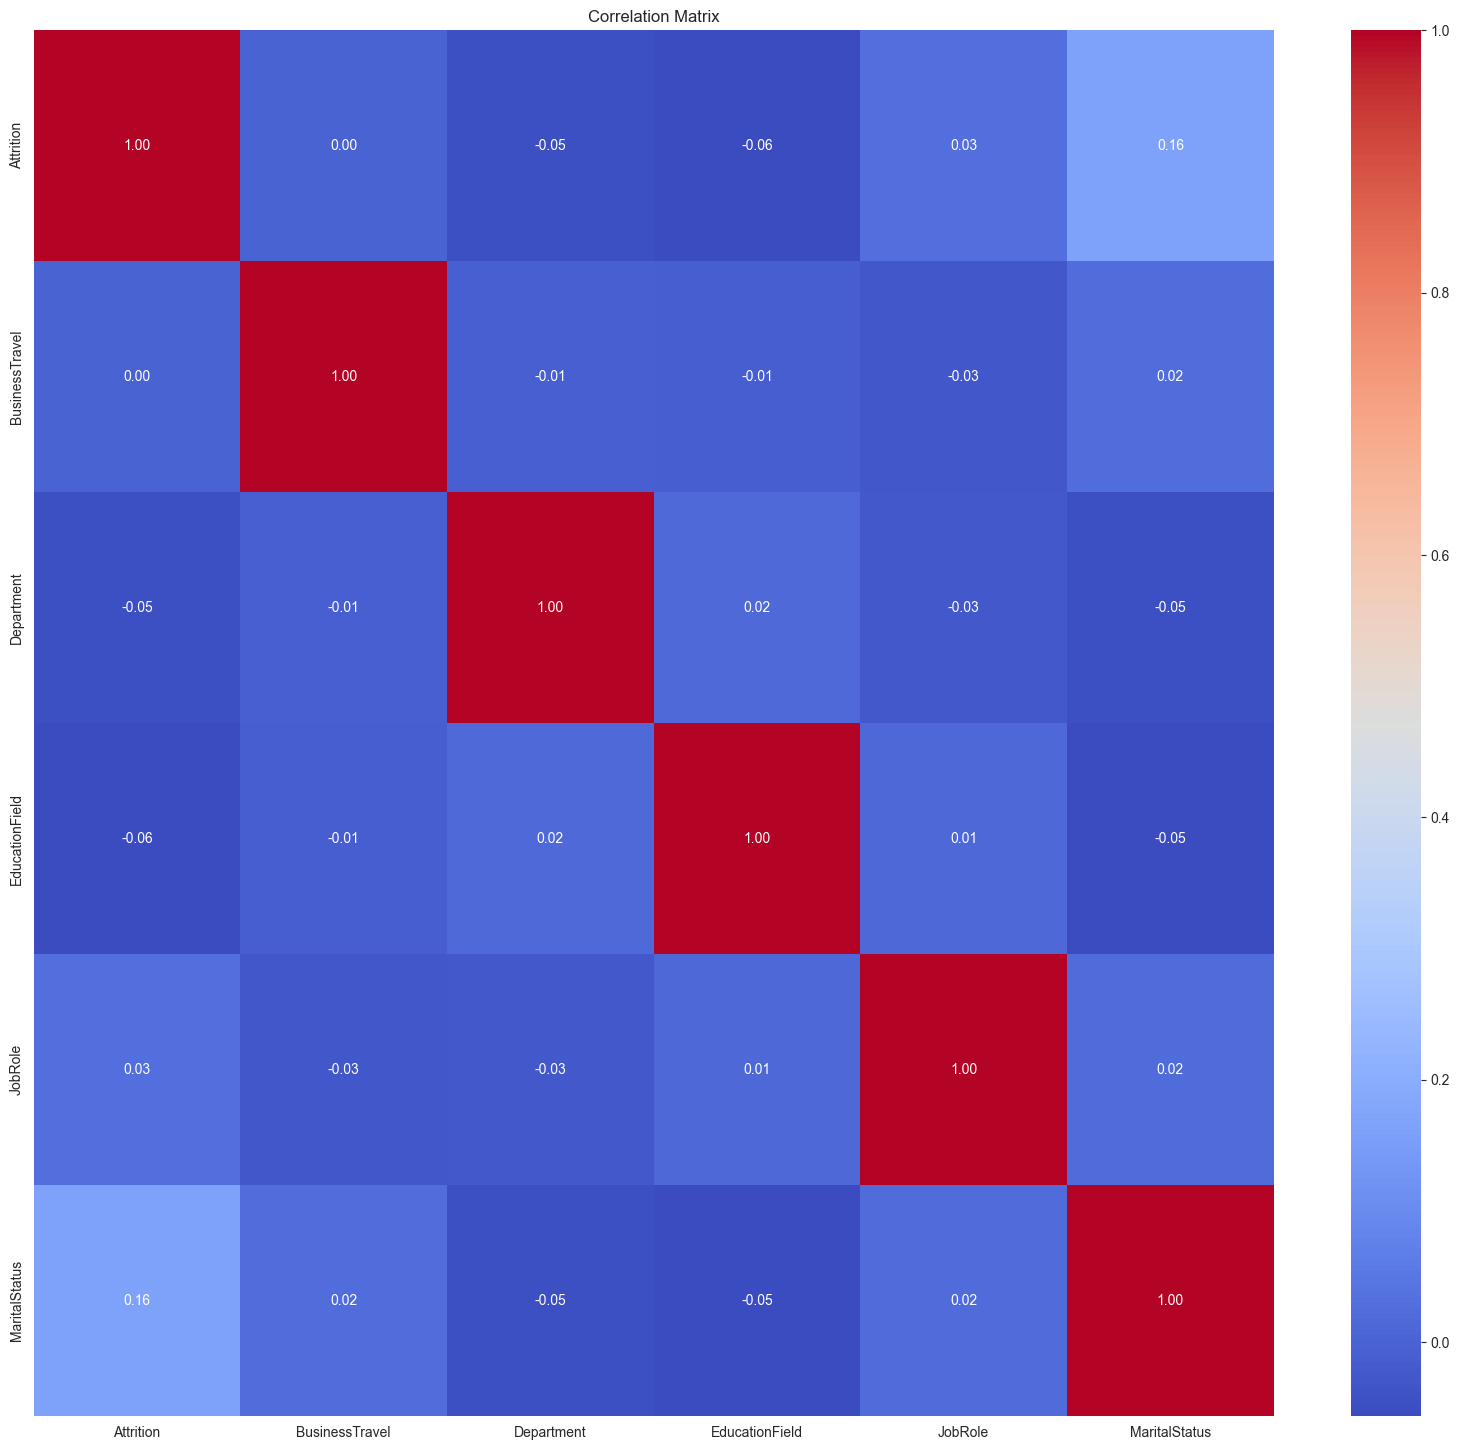

In [1700]:
plt.figure(figsize=(20, 18))
sns.heatmap(nocorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [1701]:
no_numerical_features

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,0,2,2,1,0,1
1,1,1,1,1,6,2
2,0,1,1,4,7,1
3,0,0,1,1,1,1
4,0,2,1,3,7,2
...,...,...,...,...,...,...
4404,0,2,2,4,1,2
4405,0,2,1,3,6,2
4406,0,2,1,3,2,0
4407,0,2,1,1,7,1


In [1702]:
df_scaled=pd.DataFrame(scaled_num, columns=numerical_features.columns)



In [1703]:
final=pd.concat([no_numerical_features,df_scaled], axis=1)

In [1704]:
fcorr=final.corr()

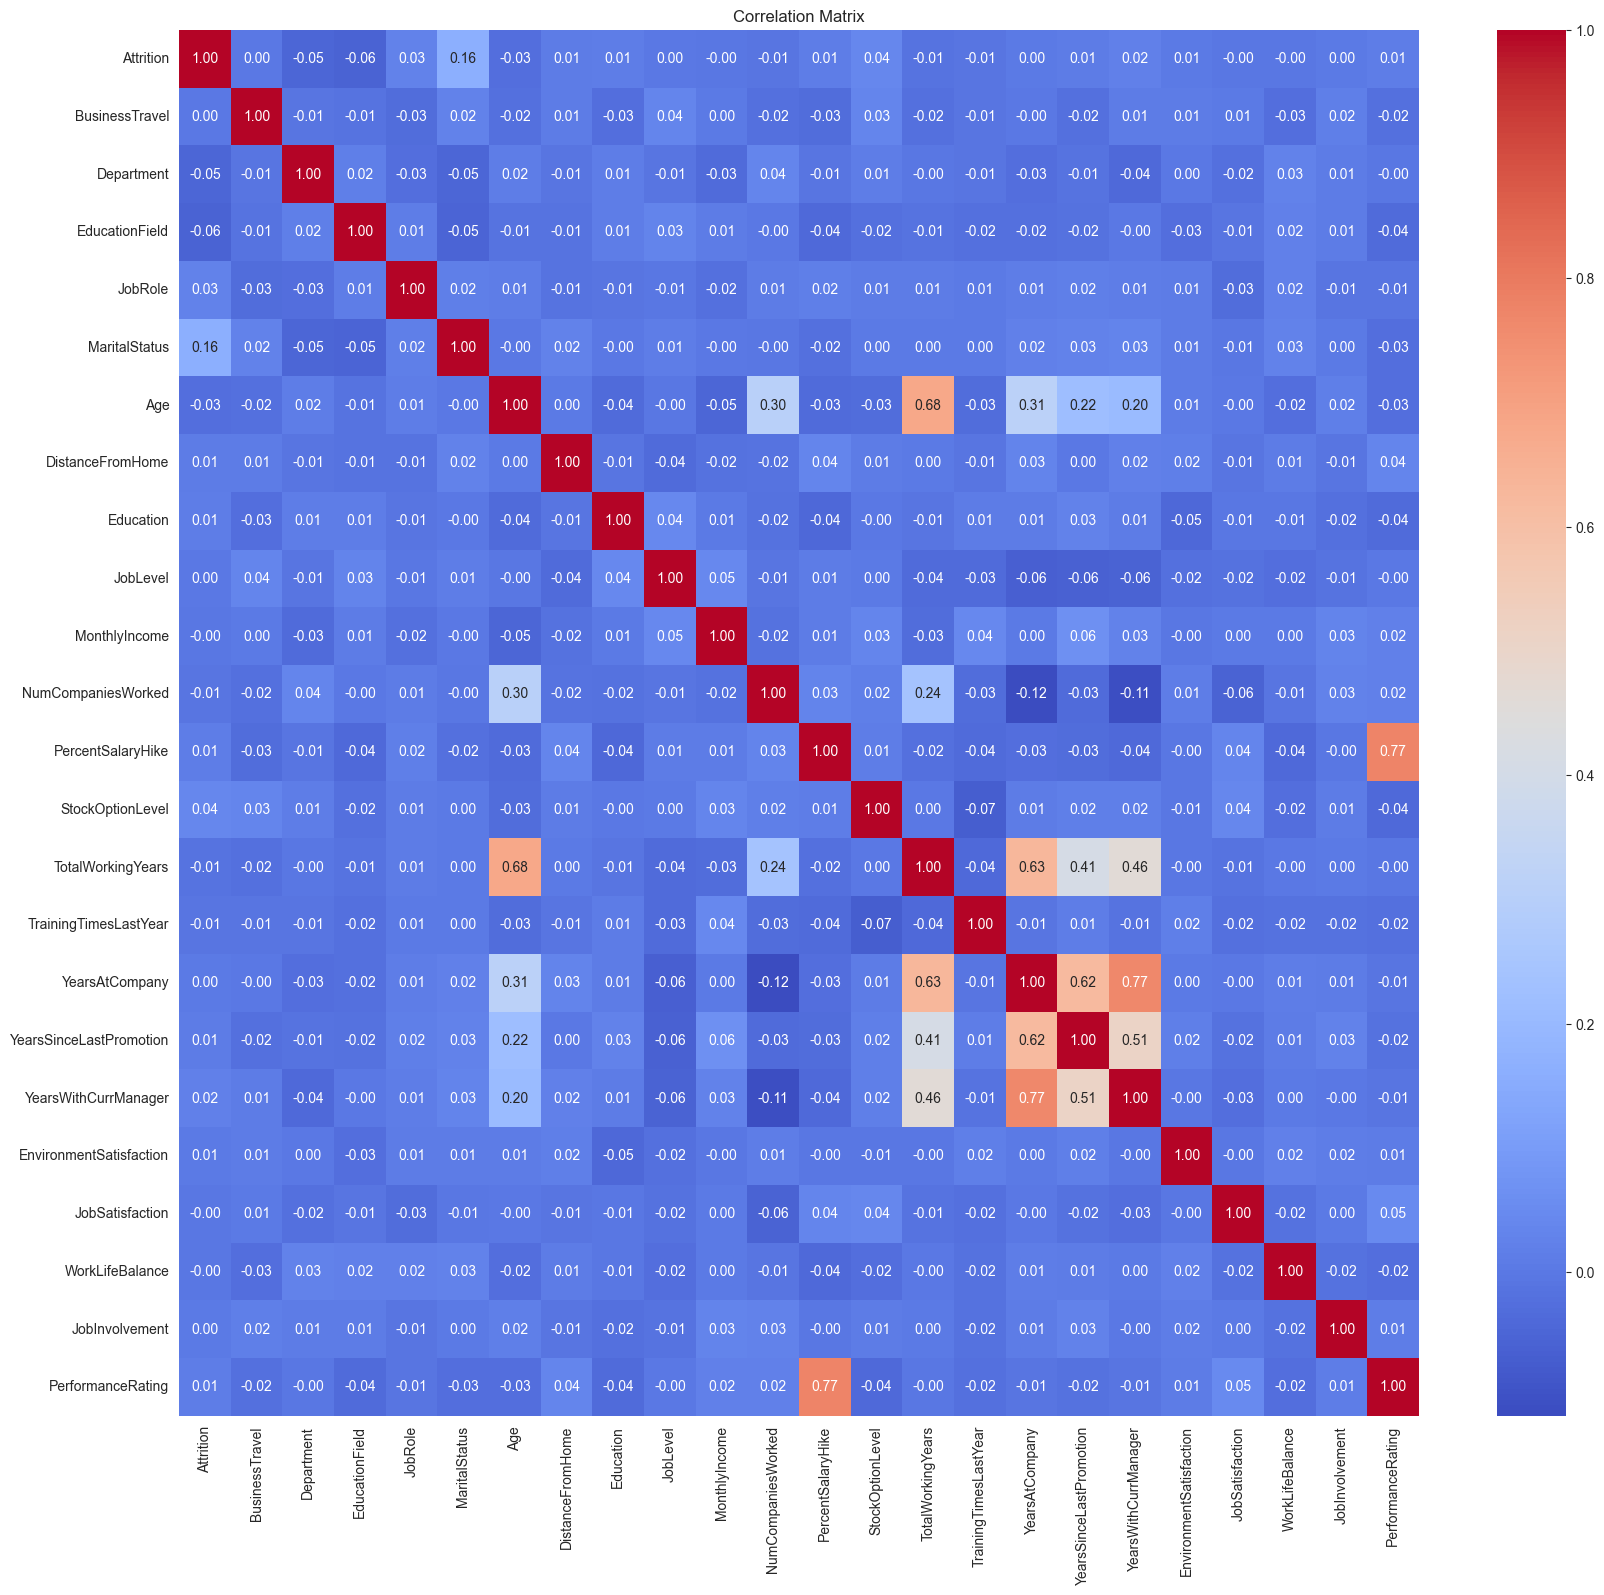

In [1705]:
plt.figure(figsize=(20, 18))
sns.heatmap(fcorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

KPI


In [1706]:



nombre_departs = df_general_explo['Attrition'].value_counts()['Yes']
nombre_employes_total = len(df_general_explo)
taux_rotation_personnel = (nombre_departs / nombre_employes_total) * 100

taux_rotation_personnel


16.200600878206608

In [1707]:
#Duration in the position

df_general_explo['DurationInPosition'] = df_general_explo['YearsAtCompany'] - df_general_explo['YearsSinceLastPromotion']


df_general_explo[['Attrition','YearsAtCompany', 'YearsSinceLastPromotion', 'DurationInPosition']]

,Attrition,YearsAtCompany,YearsSinceLastPromotion,DurationInPosition
0,No,1,0,1
1,Yes,5,1,4
2,No,5,0,5
3,No,8,7,1
4,No,6,0,6
...,...,...,...,...
4404,No,6,1,5
4405,No,3,0,3
4406,No,3,0,3
4407,No,4,1,3


In [1708]:
px.histogram(df_general_explo, x='JobRole', y='DurationInPosition', histfunc='avg' )

In [1709]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
DurationInPosition           int64
dtype: object

In [1710]:
df_general_explo.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,DurationInPosition
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,...,6,1,0,0,3.0,4.0,2.0,3,3,1
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,...,3,5,1,4,3.0,2.0,4.0,2,4,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,...,2,5,0,3,2.0,2.0,1.0,3,3,5
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,...,5,8,7,5,4.0,4.0,3.0,2,3,1
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,...,2,6,0,4,4.0,1.0,3.0,3,3,6


In [1711]:
df=df_general_explo[df_general_explo['JobRole']=='Research Scientist']

df_general_explo.groupby('JobRole')['YearsAtCompany'].mean()


JobRole
Healthcare Representative    6.598425
Human Resources              7.941558
Laboratory Technician        7.128947
Manager                      7.463333
Manufacturing Director       7.046729
Research Director            6.827731
Research Scientist           6.984936
Sales Executive              7.191867
Sales Representative         5.807377
Name: YearsAtCompany, dtype: float64

In [1712]:
df.groupby('Attrition')['YearsAtCompany'].mean()


Attrition
No     7.322443
Yes    5.490566
Name: YearsAtCompany, dtype: float64

In [1713]:
px.histogram(df_general_explo, x='YearsAtCompany', y='Attrition', histfunc='avg')

In [1714]:
df_general_explo.groupby('JobRole')['JobSatisfaction'].mean()


JobRole
Healthcare Representative    2.721785
Human Resources              3.006494
Laboratory Technician        2.689474
Manager                      2.720000
Manufacturing Director       2.782710
Research Director            2.852941
Research Scientist           2.674392
Sales Executive              2.720542
Sales Representative         2.639344
Name: JobSatisfaction, dtype: float64

In [1715]:
df_global=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_global.csv')

In [1716]:
df_global

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,1.0,11,0,1.0,6,1,0,0,102529.0,391.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,0.0,23,1,6.0,3,5,1,4,109187.0,417.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,1.0,15,3,5.0,2,5,0,3,101711.0,388.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,3.0,11,3,13.0,5,8,7,5,101312.0,387.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,4.0,12,2,9.0,2,6,0,4,117573.0,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,3.0,17,1,10.0,5,3,0,2,124132.0,474.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,...,2.0,15,0,10.0,2,3,0,2,87980.0,336.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,...,0.0,20,0,5.0,4,4,1,2,106696.0,407.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,...,0.0,14,1,10.0,2,9,7,8,137145.0,523.0


In [1769]:
filtered_df = df_global[df_global['AverageHoursPerDay'] > 480]


In [1780]:
px.pie(filtered_df,names='JobRole', values='AverageHoursPerDay', color='JobRole')

In [1783]:
px.pie(filtered_df,names='Department', values='AverageHoursPerDay', color='Department')

In [1792]:
attrition_counts = filtered_df.groupby('JobRole')['Attrition'].count().reset_index()

# Create a pie chart using Plotly Express
fig = px.pie(attrition_counts, names='JobRole', values='Attrition', color='JobRole')
fig.show()

In [1795]:
attrition_counts

,JobRole,Attrition
0,Healthcare Representative,82
1,Human Resources,32
2,Laboratory Technician,160
3,Manager,68
4,Manufacturing Director,100
5,Research Director,51
6,Research Scientist,160
7,Sales Executive,181
8,Sales Representative,60


In [1800]:
attrition_counts = filtered_df.groupby('Department')['Attrition'].count().reset_index()

fig = px.pie(attrition_counts, names='Department', values='Attrition', color='Department')
fig.show()

In [1770]:
supp_filtered = filtered_df.groupby('JobRole')['AverageHoursPerDay'].mean()


In [1771]:
print(supp_filtered)


JobRole
Healthcare Representative    550.341463
Human Resources              528.500000
Laboratory Technician        542.937500
Manager                      547.676471
Manufacturing Director       542.540000
Research Director            548.196078
Research Scientist           549.112500
Sales Executive              538.751381
Sales Representative         540.216667
Name: AverageHoursPerDay, dtype: float64


In [1758]:
df_global.groupby('JobRole')['Attrition'].count()


JobRole
Healthcare Representative    393
Human Resources              156
Laboratory Technician        777
Manager                      306
Manufacturing Director       435
Research Director            240
Research Scientist           876
Sales Executive              978
Sales Representative         249
Name: Attrition, dtype: int64

In [1735]:
df_global.groupby('JobRole')['AverageHoursPerDay'].count()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,4,Research Director,...,3.0,13,0,28.0,5,7,7,7,153406.0,586.0
12,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,13,1,Sales Executive,...,0.0,17,0,37.0,2,36,4,13,127689.0,487.0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,14,1,Research Scientist,...,1.0,11,2,10.0,4,10,9,9,132420.0,505.0
17,37,No,Non-Travel,Research & Development,1,3,Medical,18,2,Sales Executive,...,2.0,13,1,15.0,2,5,0,2,162451.0,620.0
19,38,No,Travel_Rarely,Research & Development,8,3,Life Sciences,20,1,Manager,...,1.0,11,1,8.0,5,8,7,7,128691.0,491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,33,Yes,Travel_Rarely,Sales,11,4,Marketing,4387,1,Research Scientist,...,5.0,21,0,8.0,2,5,0,4,152482.0,582.0
4387,43,No,Travel_Rarely,Sales,1,3,Marketing,4388,2,Manufacturing Director,...,5.0,24,0,22.0,3,17,1,9,131644.0,502.0
4389,52,No,Non-Travel,Research & Development,2,3,Technical Degree,4390,1,Sales Executive,...,1.0,14,0,33.0,3,33,15,12,128840.0,492.0
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,4392,3,Healthcare Representative,...,0.0,11,0,4.0,2,3,1,2,146428.0,559.0


In [1802]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
DurationInPosition           int64
dtype: object

In [1806]:
px.bar(df_general_explo, x='NumCompaniesWorked', y='Attrition')

In [ ]:
px.pie(df_general_explo,names='Department', values='AverageHoursPerDay', color='Department')